In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import os,sys
import pylab as plt
%matplotlib inline

import glob


In [2]:
src_dir = '../src'
sys.path.append(src_dir)
from jsd import jsdalpha

In [3]:
src_meta = '../../gutenberg/src/'
sys.path.append(src_meta)
from metaquery import meta_query


In [4]:
# Load meta data

In [5]:
meta=meta_query(path=src_meta+'../metadata/metadata.csv')

In [6]:
meta.reset()
meta.filter_lang('en',how='only')
list_books = meta.get_ids()

In [7]:
# filename1
def textlength(filename):
    with open(filename,'r') as f:
        x=f.readlines()
        N=len(x)
    return N


In [8]:
arr_alpha = np.linspace(0.0,5.0,51)
Npair = 1000
weights = False ## standard 1/2,1.2
normalized = True ## 0<=divergence <=1

path_read = '../../gutenberg/data/counts/'

arr_jsd = np.zeros((Npair,len(arr_alpha)))
arr_N = np.zeros((Npair,2))

books_tmp = list_books
for i_Npair in range(Npair):

    book_sel = True
    while book_sel== True:
        pg1, = np.random.choice(books_tmp,replace=False,size=1)
        fname_read = '%s_counts.txt'%(pg1)
        filename1 = os.path.join(path_read,fname_read)
        if os.path.isfile(filename1):
            book_sel = False   

    book_sel = True
    while book_sel== True:
        pg2, = np.random.choice(books_tmp,replace=False,size=1)
        fname_read = '%s_counts.txt'%(pg2)
        filename2 = os.path.join(path_read,fname_read)
        if pg1!=pg2 and os.path.isfile(filename2):
            book_sel = False

    N1 = textlength(filename1)
    N2 = textlength(filename2)
    arr_N[i_Npair,:] = [N1,N2]
    
    jsd = jsdalpha(filename1,filename2,alpha=arr_alpha,weights=weights,normalized=normalized)
    arr_jsd[i_Npair,:] = jsd


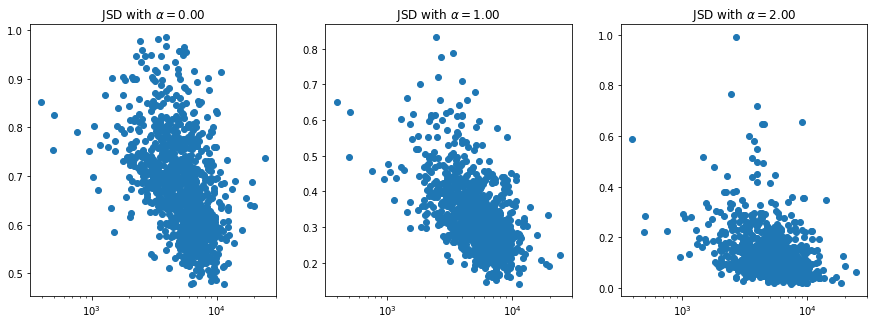

In [12]:
alpha_plot = [0.0,1.0,2.0]
i_alpha_plot = 0
f=plt.figure(figsize = (15,5))
for i_alpha,alpha in enumerate(arr_alpha):
    if alpha in alpha_plot:
        ax=f.add_subplot(1,3,i_alpha_plot+1)
        
        x = np.mean(arr_N,axis=1)
        y = arr_jsd[:,i_alpha]

        plt.plot(x,y,lw=0,marker='o')

        _ = ax.set_title(r'JSD with $\alpha = %.2f$'%(alpha))
        i_alpha_plot+=1
    #     if i_alpha>0:
    #         ax.set_yticklabels([])
        ax.set_xscale('log')

In [13]:
arr_C = 0.0*arr_alpha
for i_alpha,alpha in enumerate(arr_alpha):

    x = np.mean(arr_N,axis=1)
    y = arr_jsd[:,i_alpha]
    C = np.corrcoef(x,y)[0,1]
    arr_C[i_alpha] = C

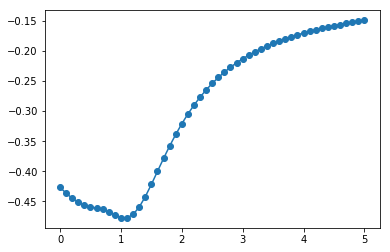

In [14]:
plt.plot(arr_alpha,arr_C,marker='o')